

# 项目：测试一种感知现象

<a id='intro'></a>
## 简介
<ul>
<li>在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。</li>
</ul>

### 对数据进行分析

In [27]:
import pandas as pd
import numpy as np
import seaborn as pandas
import matplotlib.pyplot as plt
import scipy.stats as stats
from ipykernel import kernelapp as app
%matplotlib inline

In [28]:
#加载csv文件
df = pd.read_csv('stroopdata.csv')
df.head() #查看前5列

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


问题1：确认试验中的变量

使用t检验的先决条件：主要用于样本含量较小（例如n<30，此样本的n=24），总体标准差σ未知的正态分布。

由于此样本很小，我们假设这个样本符合正太分布。

t检验可用于比较两次试验是否存在差别。

为了进行独立样本t检验，需要一个自（分组）变量：试验中的一致性试验和非一致性试验。与一个因变量：测量出来的每个样本两次试验的结果。根据自变量的特定值，比较各组中因变量的均值。用t检验比较数据试验结果的均值。

问题2a：建立假设

u0 = df['Congruent'].mean()

u1 = df['Incongruent'].mean()

零假设H0:  u0 = u1

对立假设H1: u0 ！= u1

选用双侧检验

选用alpha=0.05的统计显著水平。

In [23]:
df['Congruent'].mean()

14.051125000000004

In [24]:
df['Incongruent'].mean()

22.01591666666667

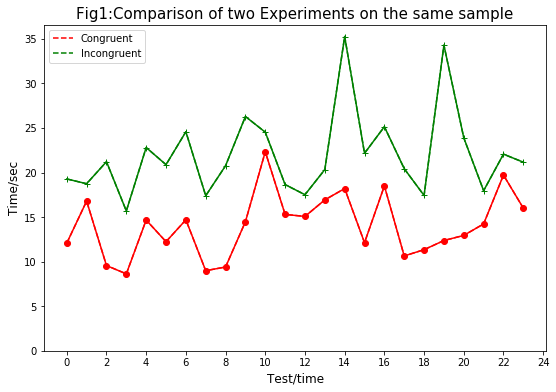

In [10]:
plt.figure(figsize=(9, 6))
x1=range(24)
y1=list(df.Congruent)
x2=range(24)
y2=list(df.Incongruent)

l1=plt.plot(x1,y1,'r--',label='Congruent') 
l2=plt.plot(x2,y2,'g--',label='Incongruent')
plt.plot(x1,y1,'ro-',x2,y2,'g+-')  
plt.title('Fig1:Comparison of two Experiments on the same sample',fontsize=15)  
plt.xlabel('Test/time',fontsize=12)  
plt.ylabel('Time/sec',fontsize=12)  
plt.xticks(np.arange(0, 25, 2),fontsize=10)
plt.yticks(np.arange(0, 40, 5),fontsize=10)
plt.legend()  
plt.show()  

从Fig1中清晰看出非一致性试验时间高于一致性试验时间，这是一个样本量，我们要通过t检验的方式来证明这一心理学效应确实存在。

独立样本， t-test。选择双侧检验，以及统计显著性水平alpha0.05 运行。

In [25]:
stats.ttest_ind(df['Congruent'], df['Incongruent'],equal_var = True)

Ttest_indResult(statistic=-6.5322505539032285, pvalue=4.5949489622951854e-08)

从输出结果查看t检验的p值，是否达到显著水平。

pvalue = 4.59e-08

pvalue < 0.05

是，接受H1。一致性试验均值结果与非一致性试验结果不同，存在差异。

注来源：

1、https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md

2、https://baike.baidu.com/item/t%E6%A3%80%E9%AA%8C#2

3、https://wapbaike.baidu.com/item/t%E6%A3%80%E9%AA%8C/9910799?fr=aladdin&bk_tashuoStyle=topLeft&bk_share=qqbrowser&bk_sharefr=lemma&sc_id=WOoF1nC

